# Step by Step Plan
- Objective: Predict FraudIndicator and SuspiciousFlag from the transaction dataset.
- Target Variables: FraudIndicator and SuspiciousFlag (both binary classification tasks).
- Approach: Use machine learning classification models to predict fraud and suspicious behavior based on transaction data.

- Step 1&2: Data Preprocessing
Load and Inspect Data: Load the dataset and inspect it for missing values, duplicates, and data types.
Scaling: Normalize or standardize numerical features (Amount, TransactionAmount, etc.) for algorithms sensitive to scale.

- Step 3: Model Development
Split Data into Features and Targets: Define X (features) and y (targets). and train two separate RandomForestClassifiers: one for FraudIndicator and one for SuspiciousFlag.

- Step 4: Model Evaluation
Evaluate each model using ROC Curve and AUC 



# Load Dataset

In [14]:
import pandas as pd
df = pd.read_csv("Train_data.csv")
df

,TransactionID,Amount,CustomerID,Timestamp,MerchantID,TransactionAmount,AnomalyScore,Name,Age,Address,...,LastLogin,MerchantName,Location,Category_Food,Category_Online,Category_Other,Category_Retail,Category_Travel,SuspiciousFlag,FraudIndicator
0,1,55.530334,1952,1640995200,2701,79.413607,0.686699,1952,50,1952,...,1723161600,2701,2701,0,0,1,0,0,0,0
1,2,12.881180,1027,1640998800,2070,12.053087,0.081749,1027,46,1027,...,1643241600,2070,2070,0,1,0,0,0,0,0
2,3,50.176322,1955,1641002400,2238,33.310357,0.023857,1955,34,1955,...,1723420800,2238,2238,0,0,0,0,1,0,0
3,4,41.634001,1796,1641006000,2879,46.121117,0.876994,1796,33,1796,...,1709683200,2879,2879,0,0,0,0,1,0,0
4,5,78.122853,1946,1641009600,2966,54.051618,0.034059,1946,18,1946,...,1722643200,2966,2966,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,19.876750,1411,1644577200,2150,89.457059,0.266778,1411,19,1411,...,1676419200,2150,2150,1,0,0,0,0,0,0
996,997,96.299792,1566,1644580800,2888,47.958030,0.512483,1566,39,1566,...,1689811200,2888,2888,0,0,0,1,0,0,0
997,998,75.164459,1654,1644584400,2037,64.210046,0.367740,1654,51,1654,...,1697414400,2037,2037,1,0,0,0,0,0,0
998,999,93.633040,1928,1644588000,2629,64.684167,0.960364,1928,60,1928,...,1721088000,2629,2629,0,0,0,0,1,0,0


# Clean data

In [15]:
# Check for missing values
df.isnull().sum()

TransactionID        0
Amount               0
CustomerID           0
Timestamp            0
MerchantID           0
TransactionAmount    0
AnomalyScore         0
Name                 0
Age                  0
Address              0
AccountBalance       0
LastLogin            0
MerchantName         0
Location             0
Category_Food        0
Category_Online      0
Category_Other       0
Category_Retail      0
Category_Travel      0
SuspiciousFlag       0
FraudIndicator       0
dtype: int64

In [16]:
# Drop duplicates if any
df = df.drop_duplicates()

In [17]:
# Check data types
df.dtypes

TransactionID          int64
Amount               float64
CustomerID             int64
Timestamp              int64
MerchantID             int64
TransactionAmount    float64
AnomalyScore         float64
Name                   int64
Age                    int64
Address                int64
AccountBalance       float64
LastLogin              int64
MerchantName           int64
Location               int64
Category_Food          int64
Category_Online        int64
Category_Other         int64
Category_Retail        int64
Category_Travel        int64
SuspiciousFlag         int64
FraudIndicator         int64
dtype: object

In [20]:
# Convert data types if needed
df['TransactionID'] = df['TransactionID'].astype(int)
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['Timestamp'] = df['Timestamp'].astype('int64')

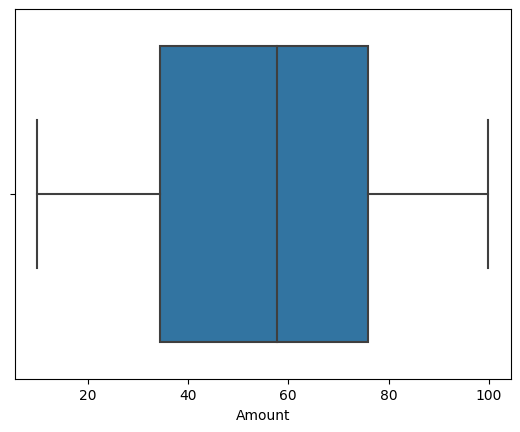

In [21]:
# Check for outliers using boxplots (for example)
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x=df['Amount'])
plt.show()

In [22]:
# Scaling numerical features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['Amount', 'TransactionAmount', 'AccountBalance']] = scaler.fit_transform(df[['Amount', 'TransactionAmount', 'AccountBalance']])


# Training

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Split data into features (X) and target (y)
X = df.drop(['TransactionID','FraudIndicator', 'SuspiciousFlag'], axis=1)
y_fraud = df['FraudIndicator']
y_suspicious = df['SuspiciousFlag']

In [24]:
# Train-test split
X_train, X_test, y_train_fraud, y_test_fraud = train_test_split(X, y_fraud, test_size=0.3, random_state=42)
X_train, X_test, y_train_suspicious, y_test_suspicious = train_test_split(X, y_suspicious, test_size=0.3, random_state=42)

# Initialize and train the model
model_fraud = RandomForestClassifier(n_estimators=100, random_state=42)
model_fraud.fit(X_train, y_train_fraud)

model_suspicious = RandomForestClassifier(n_estimators=100, random_state=42)
model_suspicious.fit(X_train, y_train_suspicious)

RandomForestClassifier(random_state=42)

In [25]:
# Predictions
y_pred_fraud = model_fraud.predict(X_test)
y_pred_suspicious = model_suspicious.predict(X_test)

# Evaluate the model
print("Fraud Model Evaluation:")
print(classification_report(y_test_fraud, y_pred_fraud))
print(confusion_matrix(y_test_fraud, y_pred_fraud))

print("Suspicious Model Evaluation:")
print(classification_report(y_test_suspicious, y_pred_suspicious))
print(confusion_matrix(y_test_suspicious, y_pred_suspicious))


Fraud Model Evaluation:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       287
           1       0.00      0.00      0.00        13

    accuracy                           0.96       300
   macro avg       0.48      0.50      0.49       300
weighted avg       0.92      0.96      0.94       300

[[287   0]
 [ 13   0]]
Suspicious Model Evaluation:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       294
           1       0.00      0.00      0.00         6

    accuracy                           0.98       300
   macro avg       0.49      0.50      0.49       300
weighted avg       0.96      0.98      0.97       300

[[294   0]
 [  6   0]]


c:\Users\hp\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\hp\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\hp\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

# Performance Evaluation

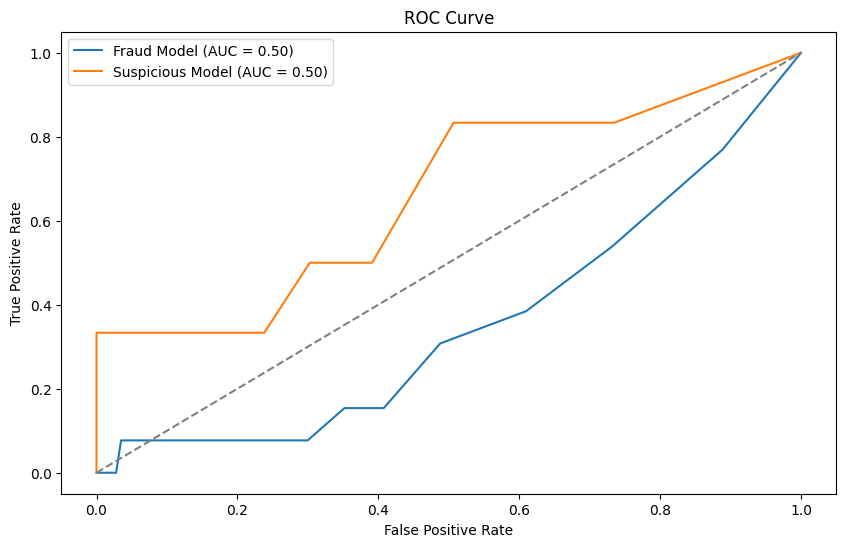

In [26]:
from sklearn.metrics import roc_auc_score, roc_curve

# ROC Curve and AUC
fpr_fraud, tpr_fraud, _ = roc_curve(y_test_fraud, model_fraud.predict_proba(X_test)[:, 1])
fpr_suspicious, tpr_suspicious, _ = roc_curve(y_test_suspicious, model_suspicious.predict_proba(X_test)[:, 1])

# Plotting the ROC curves
plt.figure(figsize=(10,6))
plt.plot(fpr_fraud, tpr_fraud, label=f'Fraud Model (AUC = {roc_auc_score(y_test_fraud, y_pred_fraud):.2f})')
plt.plot(fpr_suspicious, tpr_suspicious, label=f'Suspicious Model (AUC = {roc_auc_score(y_test_suspicious, y_pred_suspicious):.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()
